In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

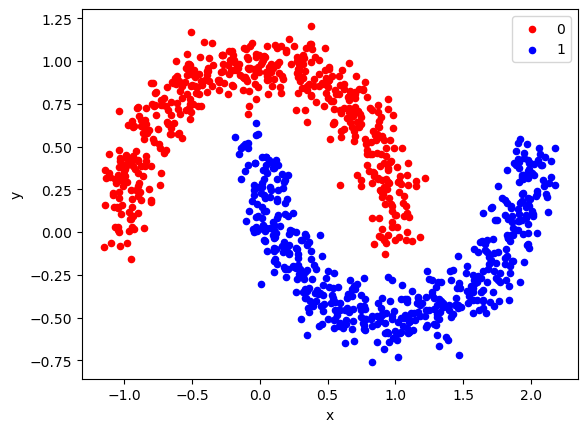

In [22]:
X, y = make_moons(n_samples=1000, noise=0.1)
df_moon = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_moon.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [49]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=2, random_state=42)

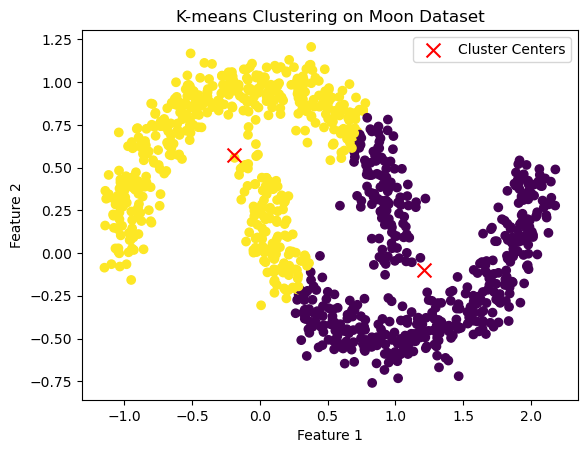

In [50]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=100, label='Cluster Centers')
plt.legend()
plt.title('K-means Clustering on Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

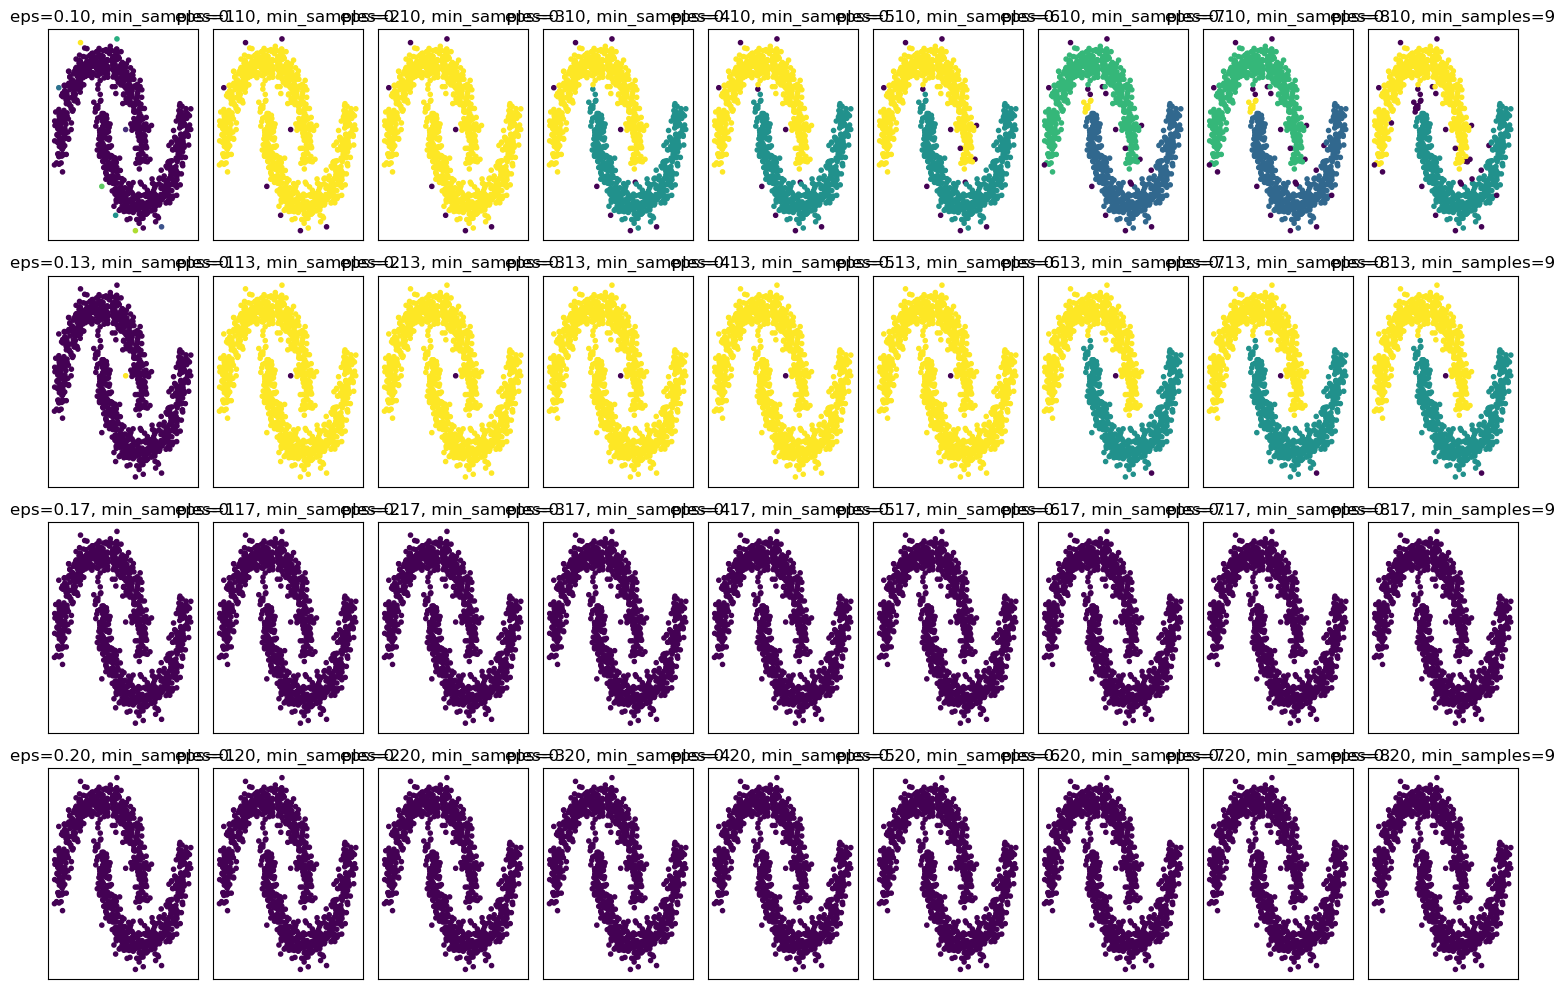

In [42]:
eps_values = np.linspace(0.1, 0.2, num=4)
min_samples_values = range(1, 10)

# Perform DBSCAN clustering for different parameter combinations
plt.figure(figsize=(15, 10))
plot_idx = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)

        # Plot DBSCAN clustering result
        plt.subplot(len(eps_values), len(min_samples_values), plot_idx)
        plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='.')
        plt.title(f'eps={eps:.2f}, min_samples={min_samples}')
        plt.xticks([])
        plt.yticks([])
        plot_idx += 1

plt.tight_layout()
plt.show()

In [45]:
dbscan = DBSCAN(eps=0.13, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=0.13, min_samples=8)

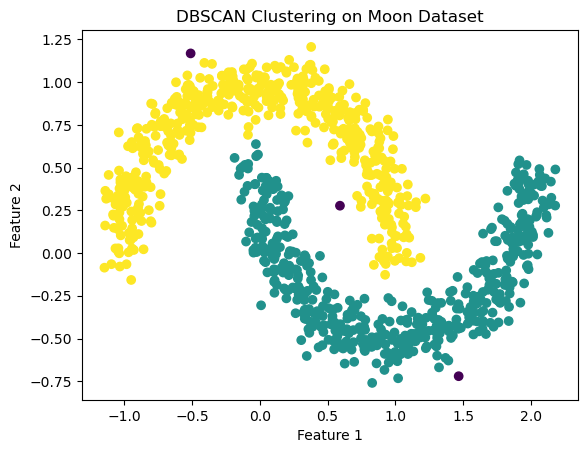

In [46]:
dbscan_labels = dbscan.labels_

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering on Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()